In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 65s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

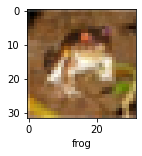

In [12]:
plot_sample(X_train, y_train, 0)

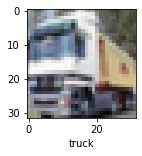

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 46ms/step - loss: 1.8151 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6262 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5455 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4845 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4354 - accuracy: 0.4962


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.46      0.53      1000
           1       0.50      0.71      0.59      1000
           2       0.42      0.30      0.35      1000
           3       0.41      0.15      0.22      1000
           4       0.59      0.20      0.30      1000
           5       0.27      0.65      0.39      1000
           6       0.64      0.33      0.43      1000
           7       0.45      0.65      0.53      1000
           8       0.71      0.44      0.55      1000
           9       0.43      0.66      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4491 - accuracy: 0.4790
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0905 - accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9749 - accuracy: 0.6644
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8982 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8315 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7771 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7294 - accuracy: 0.74670s - loss: 0.7294 
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6870 - accuracy: 0.7601
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6400 - accuracy: 0.7777
Epoch 10/10
1563/1563 [=======================

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9133 - accuracy: 0.7046


[0.9132798910140991, 0.7045999765396118]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.5669131e-02, 2.0006807e-03, 2.6209092e-02, 2.6314998e-01,
        6.4228754e-04, 5.9604335e-01, 1.2068715e-03, 8.3322864e-04,
        8.3948597e-02, 2.9677033e-04],
       [2.3260960e-04, 1.3988917e-02, 5.1809690e-07, 2.7909502e-06,
        2.6203341e-07, 3.8207126e-09, 1.2556731e-07, 2.5035014e-09,
        9.8561329e-01, 1.6145805e-04],
       [8.0916040e-02, 9.6634544e-02, 2.3105522e-03, 7.9252400e-02,
        2.2439426e-03, 1.6142288e-02, 5.5601128e-04, 1.1729257e-01,
        5.6499344e-01, 3.9658193e-02],
       [8.7417537e-01, 5.8616383e-04, 6.4625606e-02, 6.3787942e-04,
        1.7238733e-03, 3.9838255e-06, 2.2082597e-05, 2.4750200e-04,
        5.7951264e-02, 2.6279888e-05],
       [3.6089776e-07, 3.0162005e-04, 4.1762028e-02, 4.1084278e-02,
        3.2161763e-01, 1.1623446e-03, 5.9404755e-01, 1.9936373e-05,
        7.1179653e-07, 3.4596942e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

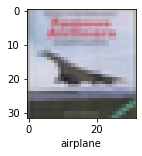

In [25]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

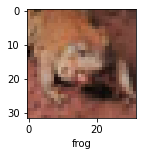

In [29]:
plot_sample(X_test, y_test,5)

In [30]:
classes[y_classes[5]]

'frog'

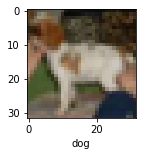

In [41]:
plot_sample(X_test, y_test,12)

In [40]:
classes[y_classes[12]]

'dog'

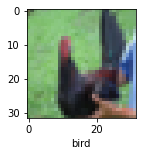

In [42]:
plot_sample(X_test, y_test,25)

In [44]:
classes[y_classes[25]]

'deer'

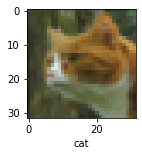

In [46]:
plot_sample(X_test, y_test,91)

In [47]:
classes[y_classes[91]]

'bird'